In [1]:
# Full name: Mai Xuan Bach
# ID: 11200489

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1.	
(Optional) Implement GMM algorithm by Numpy.

In [3]:
from scipy.stats import multivariate_normal

In [4]:
class GMM:
    def __init__(self, k, max_iter = 1000):
        self.k = k
        self.max_iter = int(max_iter)

    def initialize(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape

        self.phi = np.full(shape = self.k, fill_value = 1 / self.k)
        self.weights = np.full(shape = self.shape, fill_value = 1/ self.k)
        
        random_row = np.random.randint(low = 0, high = self.n, size = self.k)
        self.mu = [X[row_index,:] for row_index in random_row]
        self.sigma = [np.cov(X.T) for _ in range(self.k)]

    def e_step(self, X):
        # E-Step: update weights and phi holding mu and sigma constant
        self.weights = self.predict_proba(X)
        self.phi = self.weights.mean(axis = 0)
    
    def m_step(self, X):
        # M-Step: update mu and sigma holding phi and weights constant
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()
            self.mu[i] = (X * weight).sum(axis = 0) / total_weight
            self.sigma[i] = np.cov(X.T, 
                aweights=(weight / total_weight).flatten(), 
                bias=True)

    def fit(self, X):
        self.initialize(X)
        
        for iteration in range(self.max_iter):
            self.e_step(X)
            self.m_step(X)
            
    def predict_proba(self, X):
        likelihood = np.zeros( (self.n, self.k) )
        for i in range(self.k):
            distribution = multivariate_normal(
                mean = self.mu[i], 
                cov = self.sigma[i])
            likelihood[:,i] = distribution.pdf(X)
        
        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights
    
    def predict(self, X):
        weights = self.predict_proba(X)
        return np.argmax(weights, axis=1)

# 2.	
Create at least three toy dataset (https://scikit-learn.org/stable/datasets/sample_generators.html), then apply GMM algorithm built in the first question or used sklearn library? 

Try different number of cluster to see how the result change? 

Draw the elbow and Silhouette score for the above dataset.

## First dataset

In [5]:
from sklearn.datasets import make_blobs

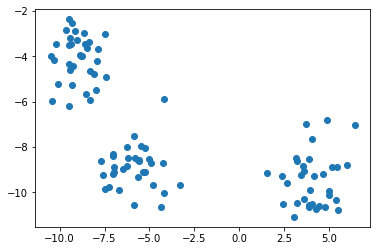

In [6]:
# Tạo dữ liệu ngẫu nhiên
X, y = make_blobs(n_samples=100, centers=3, random_state=21)
plt.scatter(X[:, 0], X[:, 1])

### k = 3

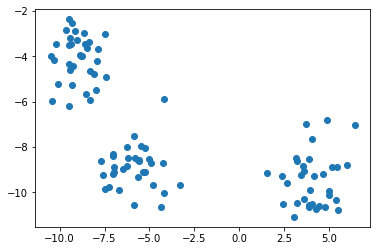

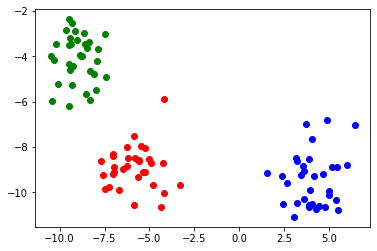

In [7]:
# fit the GMM to the toy dataset
gmm = GMM(k=3)
gmm.fit(X)

# plot the toy dataset
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# predict the clusters of the toy dataset
y_pred = gmm.predict(X)

# plot the predicted clusters
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(3):
    plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1], color=colors[i])
plt.show()

In [8]:
# use sklearn
from sklearn.mixture import GaussianMixture

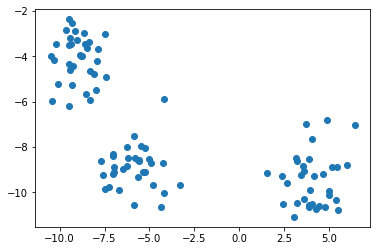

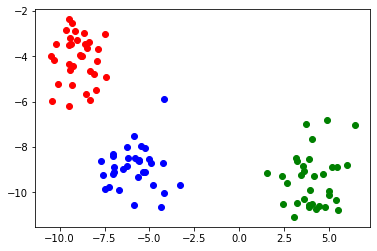

In [9]:
def gmm_model_visualize(k, X):
    gm = GaussianMixture(n_components=k).fit(X)

    # plot the toy dataset
    plt.scatter(X[:, 0], X[:, 1])
    plt.show()

    # predict the clusters of the toy dataset
    y_pred = gm.predict(X)

    # plot the predicted clusters
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for i in range(k):
        plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1], color=colors[i])
    plt.show()
    
gmm_model_visualize(3, X)

### k = 2

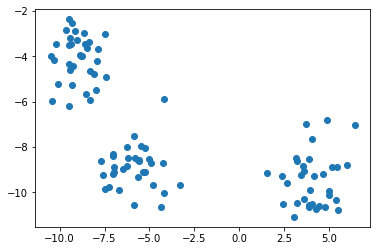

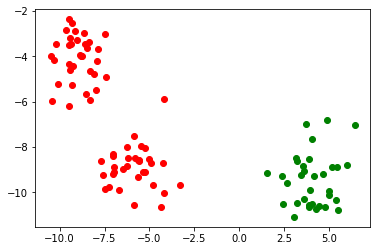

In [10]:
gmm_model_visualize(2, X)

### k = 4

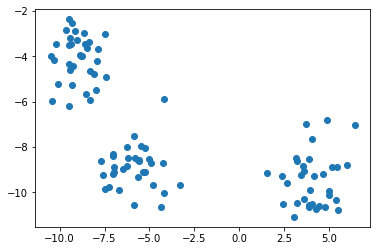

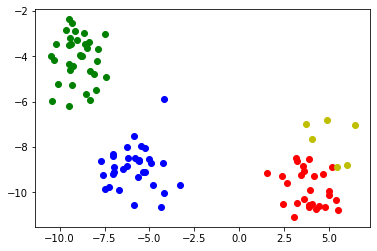

In [11]:
gmm_model_visualize(4, X)

### k = 5

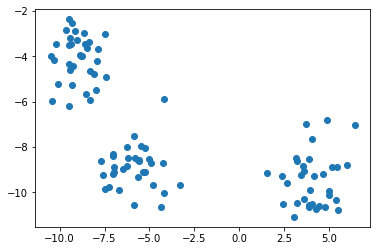

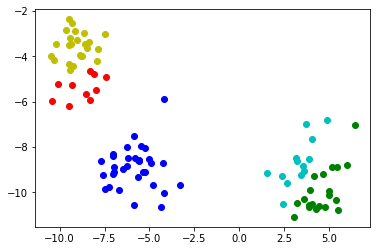

In [12]:
gmm_model_visualize(5, X)

## 2nd dataset

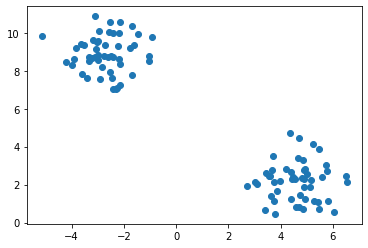

In [13]:
# Tạo dữ liệu ngẫu nhiên
X_dataset_2, y = make_blobs(n_samples=100, centers=2, random_state=42)
plt.scatter(X_dataset_2[:, 0], X_dataset_2[:, 1])

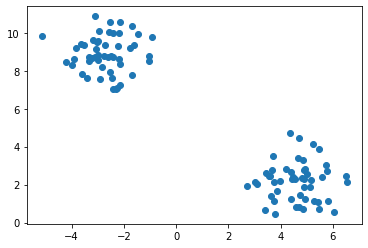

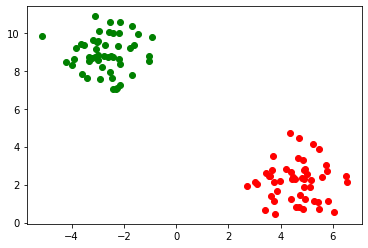

In [14]:
gmm_model_visualize(2, X_dataset_2)

## 3rd dataset

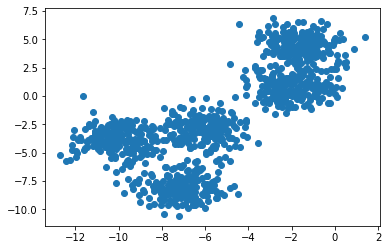

In [15]:
# Tạo dữ liệu ngẫu nhiên
X_dataset_3, y = make_blobs(n_samples=1000, centers=5, random_state=1)
plt.scatter(X_dataset_3[:, 0], X_dataset_3[:, 1])

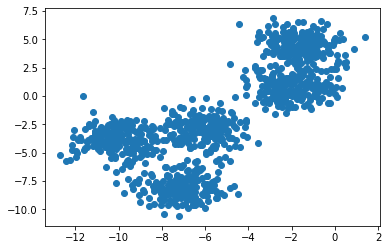

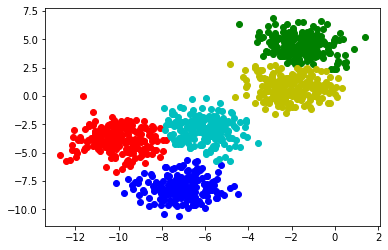

In [16]:
gmm_model_visualize(5, X_dataset_3)

## Draw the elbow and Silhouette score for the above dataset.

### Silhouette
The Silhouette score ranges from -1 to 1, where a score close to 1 indicates that the data points are well separated and grouped into similar clusters, while a score close to -1 indicates that the data points are poorly separated and grouped into dissimilar clusters.

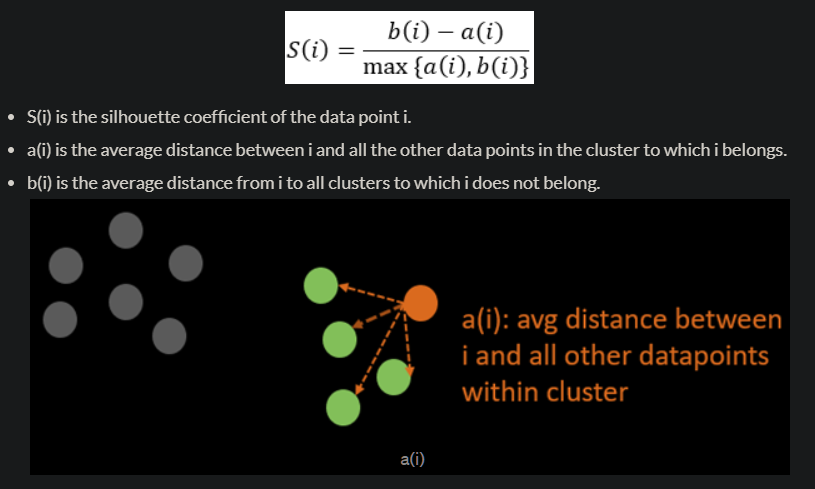

In [17]:
from sklearn.metrics import silhouette_score

[0.7231621973538868, 0.7317634211347452, 0.5769246760398509, 0.5786965028172099, 0.4637229203850061, 0.4523960412897097, 0.35676764498649016, 0.3236706580572136, 0.2842799152741213, 0.28348663472913876, 0.3290048570922681, 0.31461016843850453, 0.3334787617992726]


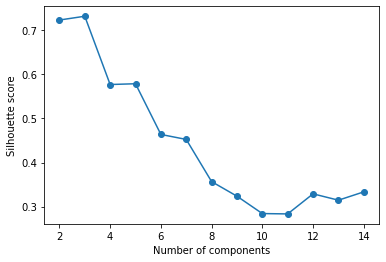

In [18]:
def draw_silhouette(X):
    # Initialize an array to store the WCSS values
    score = []

    # Fit the GMM model for different number of components
    for i in range(2, 15):
        gmm = GaussianMixture(n_components=i, random_state=0)
        gmm.fit(X)
        
        labels = gmm.predict(X)
        sil = silhouette_score(X, labels, metric='euclidean')
        score.append(sil)

    print(score)
    # Plot the WCSS values against the number of components
    plt.plot(range(2, 15), score, marker='o')
    plt.xlabel('Number of components')
    plt.ylabel('Silhouette score')
    plt.show()
                     
draw_silhouette(X)

### AIC BIC

AIC (Akaike Information Criteria) and BIC (Bayesian Information Criteria) are two commonly used measures for model selection. They are used to evaluate the quality of the models and to compare the models with different numbers of parameters.

AIC measures the relative quality of a statistical model, with respect to the number of parameters in the model and the amount of data. The smaller the AIC value, the better the model fits the data.

BIC, on the other hand, is a measure of the goodness of fit of a model, with a penalty for the number of parameters. The BIC value is larger than the AIC value, and the smaller the BIC value, the better the model fits the data.

The number of components at which the AIC and BIC values are the lowest is considered as the optimal number of clusters.

**AIC = 2k - 2ln(L)
where k is the number of parameters in the model, and L is the likelihood of the model.** 

**BIC = kln(n) - 2ln(L)
where n is the number of samples in the data, and k, L are defined as in AIC.**

In both AIC and BIC, the first term represents the penalty for the number of parameters in the model. The second term represents the likelihood of the model, with a larger penalty for models with more parameters in BIC compared to AIC.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


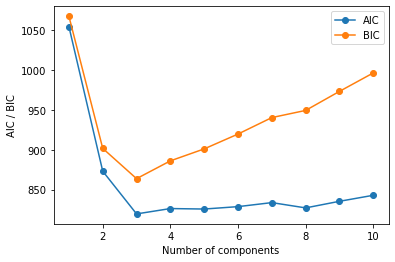

In [19]:
def draw_aic_bic(X):
    aic = []
    bic = []

    # Fit the GMM model for different number of components
    for i in range(1, 11):
        gmm = GaussianMixture(n_components=i, random_state=0)
        gmm.fit(X)
        aic.append(gmm.aic(X))
        bic.append(gmm.bic(X))

    # Plot the AIC and BIC values against the number of components
    plt.plot(range(1, 11), aic, marker='o', label='AIC')
    plt.plot(range(1, 11), bic, marker='o', label='BIC')
    plt.xlabel('Number of components')
    plt.ylabel('AIC / BIC')
    plt.legend()
    plt.show()
draw_aic_bic(X)

# 3.	
Compare kmeans and GMM (cons and pros)

## K-Means:

**Pros:**

- Simple to understand and implement.
- Fast and efficient for large datasets (Running Time).
- Better for high dimensional data.
- Easy to interpret the results.

**Cons:**

- Assumes that the clusters are spherical and equally sized.
- Sensitive to the initial centroids.
- Can only handle spherical clusters.
- Hard Assignment might lead to mis grouping.

## Gaussian Mixture Models (GMM):

**Pros:**

- Can handle clusters of different shapes and sizes.
- Flexible in modeling complex distributions.
- Generates probabilities for each point belonging to a cluster.
- Soft assignment

**Cons:**

- More complex to understand and implement.
- Can be computationally expensive for large datasets (Uses all the components it has access to, so initialization of clusters will be difficult when dimensionality of data is high).
- May converge to a local optimum.

# 4.
Find 3 examples that GMM is better than kmeans

## Eg1: Clusters with Different Shapes and Sizes

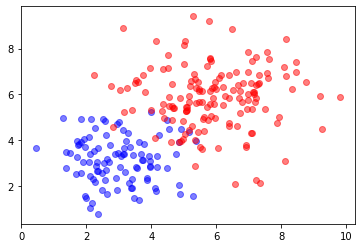

In [20]:
np.random.seed(0)

# Generate cluster 1
mean1 = [3, 3]
cov1 = [[1, 0], [0, 1]] 
cluster1 = np.random.multivariate_normal(mean1, cov1, 100)

# Generate cluster 2
mean2 = [6, 6]
cov2 = [[2, 0], [0, 2]] 
cluster2 = np.random.multivariate_normal(mean2, cov2, 150)

X_test_1 = np.concatenate((cluster1, cluster2), axis = 0) 

# Plot the two clusters
plt.scatter(cluster1[:, 0], cluster1[:, 1], color='blue', alpha=0.5)
plt.scatter(cluster2[:, 0], cluster2[:, 1], color='red', alpha=0.5)
plt.show()

In [21]:
from sklearn.cluster import KMeans
def kmean(X, k):
    # Khởi tạo KMeans
    kmeans = KMeans(n_clusters=k)

    # Fit dữ liệu vào KMeans
    kmeans.fit(X)

    # Trả về nhãn cho mỗi mẫu
    labels = kmeans.labels_

    # Trả về centroids
    centroids = kmeans.cluster_centers_

    # Visualization
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=colors[labels[i]])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='k')
    plt.show()

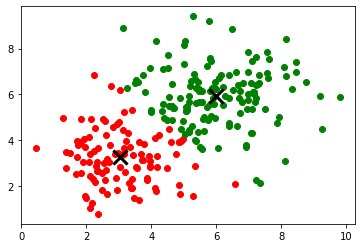

In [22]:
kmean(X_test_1, 2)

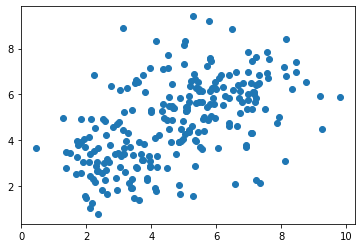

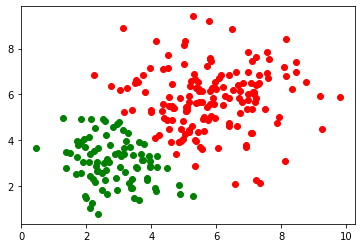

In [23]:
gmm_model_visualize(2, X_test_1)

## Eg2: Overlapping Clusters

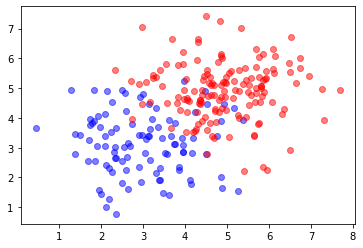

In [24]:
np.random.seed(0)

# Generate cluster 1
mean1 = [3, 3]
cov1 = [[1, 0], [0, 1]] 
cluster1 = np.random.multivariate_normal(mean1, cov1, 100)

# Generate cluster 2
mean2 = [5, 5]
cov2 = [[1, 0], [0, 1]] 
cluster2 = np.random.multivariate_normal(mean2, cov2, 150)

X_test_2 = np.concatenate((cluster1, cluster2), axis = 0)  

# Plot the two clusters
plt.scatter(cluster1[:, 0], cluster1[:, 1], color='blue', alpha=0.5)
plt.scatter(cluster2[:, 0], cluster2[:, 1], color='red', alpha=0.5)
plt.show()

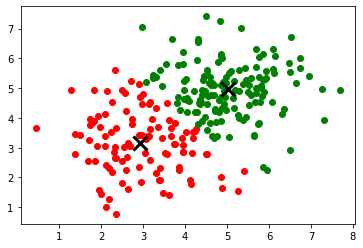

In [25]:
kmean(X_test_2, 2)

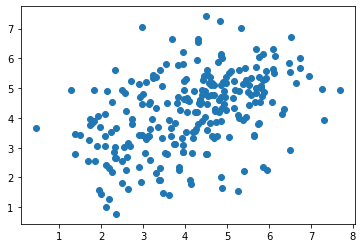

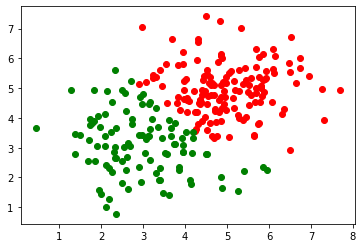

In [26]:
gmm_model_visualize(2, X_test_2)

## Eg3: Mixture of Gaussian Distributions

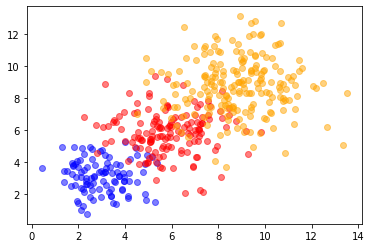

In [27]:
np.random.seed(0)

# Generate cluster 1
mean1 = [3, 3]
cov1 = [[1, 0], [0, 1]] 
cluster1 = np.random.multivariate_normal(mean1, cov1, 100)

# Generate cluster 2
mean2 = [6, 6]
cov2 = [[2, 0], [0, 2]] 
cluster2 = np.random.multivariate_normal(mean2, cov2, 150)

# Generate cluster 3
mean3 = [9, 9]
cov3 = [[3, 0], [0, 3]] 
cluster3 = np.random.multivariate_normal(mean3, cov3, 200)

X_test_3 = np.concatenate((cluster1, cluster2, cluster3), axis = 0)  

# Plot the three clusters
plt.scatter(cluster1[:, 0], cluster1[:, 1], color='blue', alpha=0.5)
plt.scatter(cluster2[:, 0], cluster2[:, 1], color='red', alpha=0.5)
plt.scatter(cluster3[:, 0], cluster3[:, 1], color='orange', alpha=0.5)
plt.show()

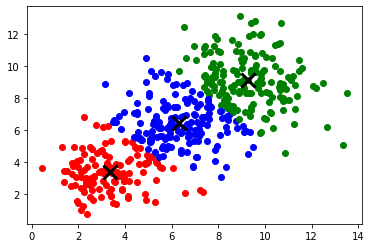

In [28]:
kmean(X_test_3, 3)

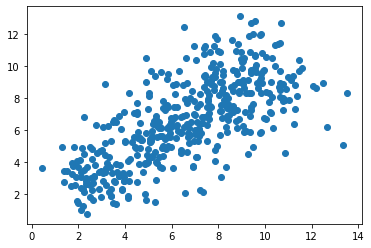

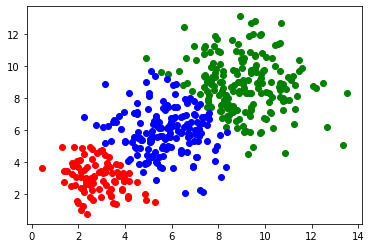

In [29]:
gmm_model_visualize(3, X_test_3)